In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import prim
from ema_workbench.analysis import dimensional_stacking


In [34]:
# Define problem formulation
from problem_formulation import get_model_for_problem_formulation
dike_model, planning_steps = get_model_for_problem_formulation(3)

INFO:dike_model_function:Model initialized


# 1. Initial Open Exploration

This file contains an exploration conducted to examine the provided dike model. Two runs of the model are analyzed: one without any policies and one with 100 randomly selected policies. Various exploratory techniques will be applied to the results of both runs. The methods covered include:

1. Multi scatter plots
2. Scenario discovery:
    2.1 Feature scoring
    2.2 Dimensional stacking
    2.3 PRIM (Patient Rule Induction Method)
3. Global sensitivity analysis

This exploration focuses on problem formulation 3, which provides the outcomes aggregated per dike ring for Expected Annual Damages, Dike Investment Cost, Room for the River Cost, Evacuation Costs, and the Expected Number of Deaths. To make the problem formulation more complete for our actor the RfR total costs and Evacuation costs where added as well. Even thought this is not of direct relevance for dike ring 4 it can be used later in the analysis to see which policies might get support from other actors. 

For the model run without policies, the Dike Investment Cost, Room for the River Cost, and Evacuation Costs are inherently zero, as no policies were implemented, resulting in no associated costs. Therefore, for the zero policy model, only the Expected Annual Damage and Expected Number of Deaths are considered.

The data utilized in this exploration is generated by three separate Python scripts:
- Results without policies and 20.000 scenarios are produced by `open_exploration_outcomes_zero.py`
- Results with 100 random policies and 1000 scenarios are produced by `open_exploration_outcomes_random.py`
- Sobol analysis outcomes are produced by `open_exploration_sobol_outcomes.py`


In [35]:
# Outcomes from the CSV files 
outcomes_zp = pd.read_csv('data/output/open_exploration_outcomes_zero.csv')
outcomes_rp = pd.read_csv('data/output/open_exploration_outcomes_random.csv')

# Experiments form the CSV files 
experiments_zp = pd.read_csv('data/output/open_exploration_experiments_zero.csv')
experiments_rp = pd.read_csv('data/output/open_exploration_experiments_random.csv')

In [36]:
outcomes_rp.head()

,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,0.0,1.800530e+08,0.0,0.0,2.114958e+08,0.0,0.0,1.313882e+08,0.0,0.0,4.824400e+07,0.0,0.0,2.027988e+08,0.0,1.051100e+09,0.0,0
1,0.0,1.800530e+08,0.0,0.0,2.114958e+08,0.0,0.0,1.313882e+08,0.0,0.0,4.824400e+07,0.0,0.0,2.027988e+08,0.0,1.051100e+09,0.0,0
2,0.0,1.800530e+08,0.0,0.0,2.114958e+08,0.0,0.0,1.313882e+08,0.0,0.0,4.824400e+07,0.0,0.0,2.027988e+08,0.0,1.051100e+09,0.0,0
3,0.0,1.800530e+08,0.0,0.0,2.114958e+08,0.0,0.0,1.313882e+08,0.0,0.0,4.824400e+07,0.0,0.0,2.027988e+08,0.0,1.051100e+09,0.0,0
4,0.0,1.800530e+08,0.0,0.0,2.114958e+08,0.0,0.0,1.313882e+08,0.0,0.0,4.824400e+07,0.0,0.0,2.027988e+08,0.0,1.051100e+09,0.0,0


In [37]:
# Columns to keep for the analysis
columns_to_keep = [
    'A.4_Expected Annual Damage',
    'A.4_Dike Investment Costs',
    'RfR Total Costs',
    'Expected Evacuation Costs',
    'A.4_Expected Number of Deaths',    
    'policy'
]
# Filter specific for outcomes_zp
outcomes_zp = outcomes_zp[columns_to_keep]

# Filter specific for outcomes_rp
outcomes_rp = outcomes_rp[columns_to_keep]

# 1. Multiscatter Plot Analysis

The following section presents multi scatter plots that visually illustrate potential relationships between the model outcomes. One multi scatter plot will be displayed:

   - 1.1. Multi scatter plot for the model run without policies (zero policy)


## 1.1. Multi Scatter Plot for Model Run Without Policies (Zero Policy)



C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

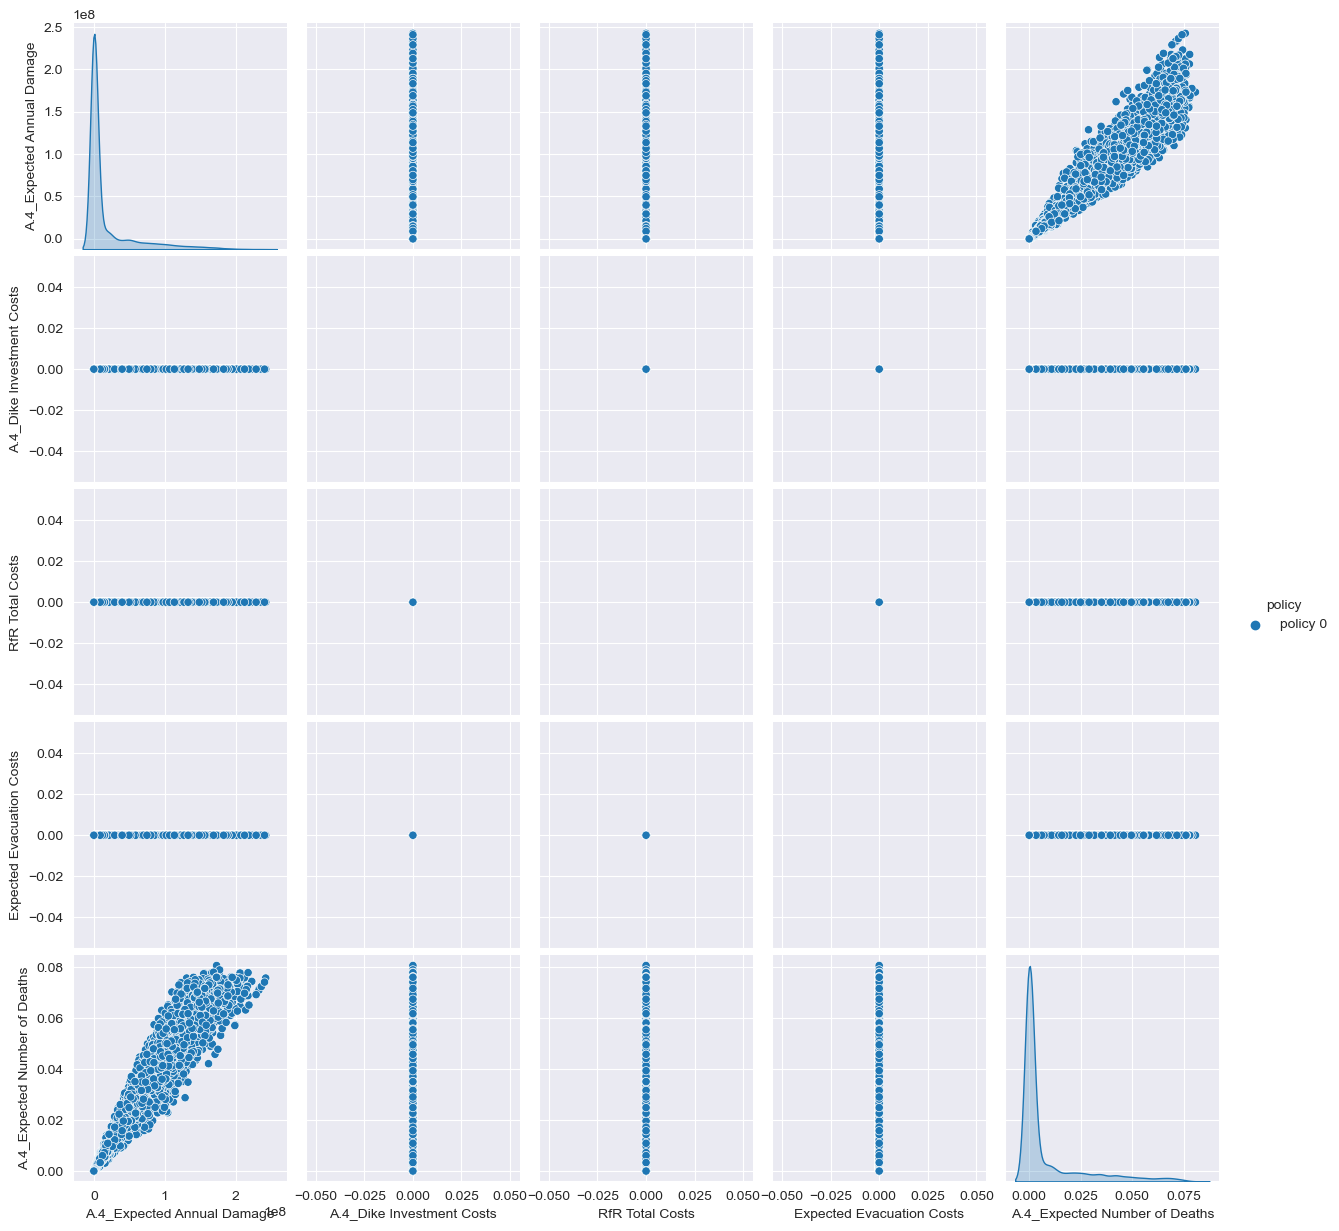

In [38]:
# Creating a pairplot for the selected outcomes
sns.pairplot(outcomes_zp, hue='policy')
plt.show()

### Interpretation of Results

The scatterplot matrix provides insights into the relationships between various outcomes. Here are the key observations:

1. **Expected Annual Damage vs. Expected Number of Deaths:**
   - There is a strong positive correlation between the expected annual damage (A_4_Expected Annual Damage) and the expected number of deaths (A_4_Expected Number of Deaths). As the annual damage increases, the number of deaths also tends to increase.

2. **Dike Investment Costs, RFR Total Costs, Evacuation Costs:**
   - The values for dike investment costs (A_4_Dike Investment Costs), RFR total costs (A_4_RFR Total Costs), and evacuation costs (A_4_Expected Evacuation Costs) remain consistently zero. This further confirms that no policy measures related to these costs were implemented in the analysis.

3. **Density Distributions:**
   - The density plots along the diagonal show the distribution of each outcome. The expected annual damage and the number of deaths have a skewed distribution, indicating that most scenarios result in low damage and deaths, but a few scenarios lead to very high values.

# 2. Scenario Discovery

This section employs three techniques to uncover scenarios: feature scoring, dimensional stacking, and PRIM (Patient Rule Induction Method).

- **Feature Scoring**: This method investigates the extent and manner in which uncertainties affect the model outcomes.
- **Dimensional Stacking**: This technique identifies the most influential uncertainties affecting model behavior.
- **PRIM**: This approach isolates uncertainties that lead to specific, predefined model outcomes.

Both dimensional stacking and PRIM require predefined thresholds to select desired outcomes, which differ for the two model runs:

1. **Zero Policy Model**: 
    - Focus is on the treshold outcomes concerning both the Expected Number of Deaths and the Expected Annual Damage.
    - This analysis provides exploratory insights for defining the reference scenario in subsequent steps.

2. **Model with 100 Random Policies**:
    - Desired outcomes are defined as having the best 10% outcomes of Deaths and in Expected Annual Damage.
    - These thresholds are chosen to evaluate policy effectiveness and the influence of uncertainties on these outcomes.

The techniques will be applied separately to each model run. For clarity, the results will be presented consecutively by model run. First, the zero policy model results are shown, followed by the results for the model with 100 random policies.


In [39]:
# A list has been created of uncertainties in the model
uncertainties_list = ['discount rate 0','discount rate 1',
                         'discount rate 2', 'A.0_ID flood wave shape',
                         'A.1_Bmax','A.1_pfail','A.1_Brate',
                         'A.2_Bmax','A.2_pfail','A.2_Brate',
                         'A.3_Bmax','A.3_pfail','A.3_Brate',
                         'A.4_Bmax','A.4_pfail','A.4_Brate',
                         'A.5_Bmax','A.5_pfail','A.5_Brate',]

uncertainties_ezp = experiments_zp.loc[:,uncertainties_list]
uncertainties_erp = experiments_rp.loc[:,uncertainties_list]

# 2.1 Scenaro discovery zero policy
## 2.1.1 Feature scoring

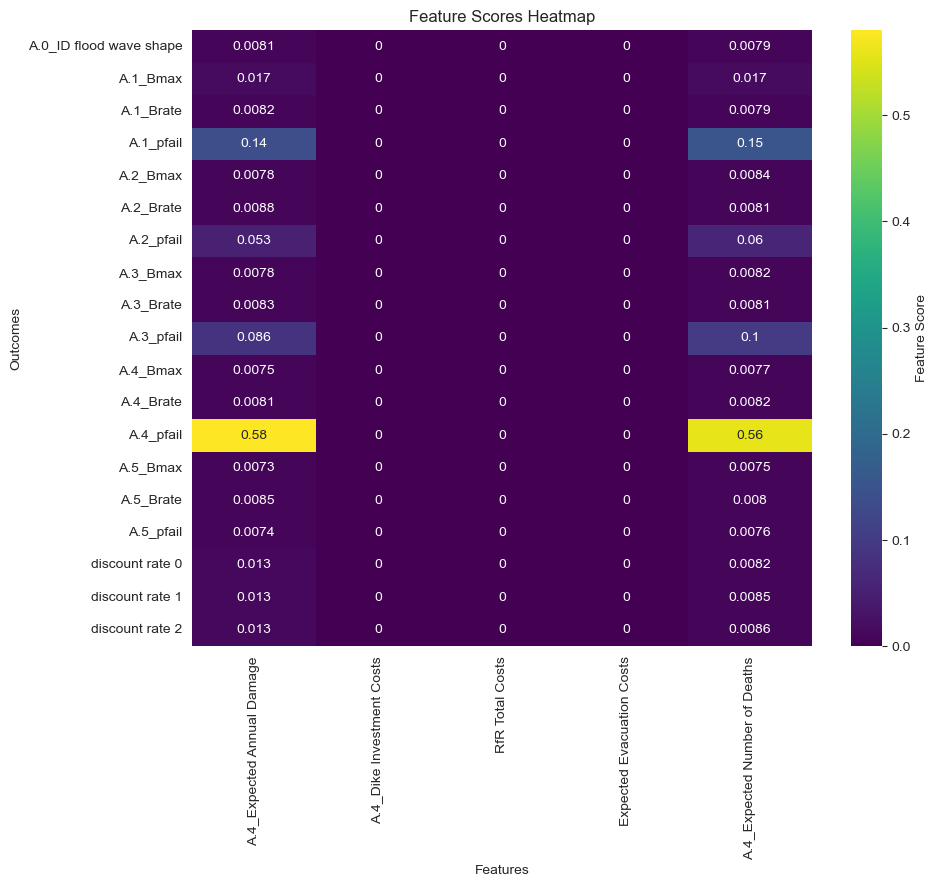

In [40]:
# Calculate feature scores for each uncertainty and all outcomes
fs = feature_scoring.get_feature_scores_all(uncertainties_ezp,
                                            outcomes_zp.drop(columns='policy'))

# Create a heatmap to visualize the feature scores
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(fs, cmap="viridis", annot=True, cbar_kws={'label': 'Feature Score'})
plt.title('Feature Scores Heatmap')
plt.xlabel('Features')
plt.ylabel('Outcomes')
plt.show()


### Interpretation of Results

The chance of A4 breaking (A4_pfail) has the largest influence on the outcomes, particularly on expected annual damage and the number of deaths. Similarly, the chance of A1 breaking (A1_pfail) also significantly impacts these criteria, though to a lesser extent.

The analysis shows zero values for dike investment costs, RFR total costs, and evacuation costs, indicating that no policy measures, such as dike investments or evacuation plans, were included in the analysis. Other parameters, such as Bmax, Brate, and other B parameters, have minimal influence on the outcomes, as indicated by the low values close to zero in the heatmap.

## 2.1.2 Dimensional stacking


### Expected Annual Damage 
A threshold was established for all Dimensional Stacking runs to cap the maximum value. This threshold was chosen to retain roughly 68% of the total values, corresponding to approximately one standard deviation.

In [41]:
# Set the threshold to determine values below a specific limit
count_below_threshold = len(outcomes_zp[outcomes_zp['A.4_Expected Annual Damage'] < 3.97e6])

# Calculate the proportion of values below the threshold
percentage_below_threshold = ((count_below_threshold / len(outcomes_zp['A.4_Expected Annual Damage'])) * 100)

# Output the calculated percentage
print("The percentage of values below the threshold is: {:.2f}%".format(percentage_below_threshold))

The percentage of values below the threshold is: 68.00%


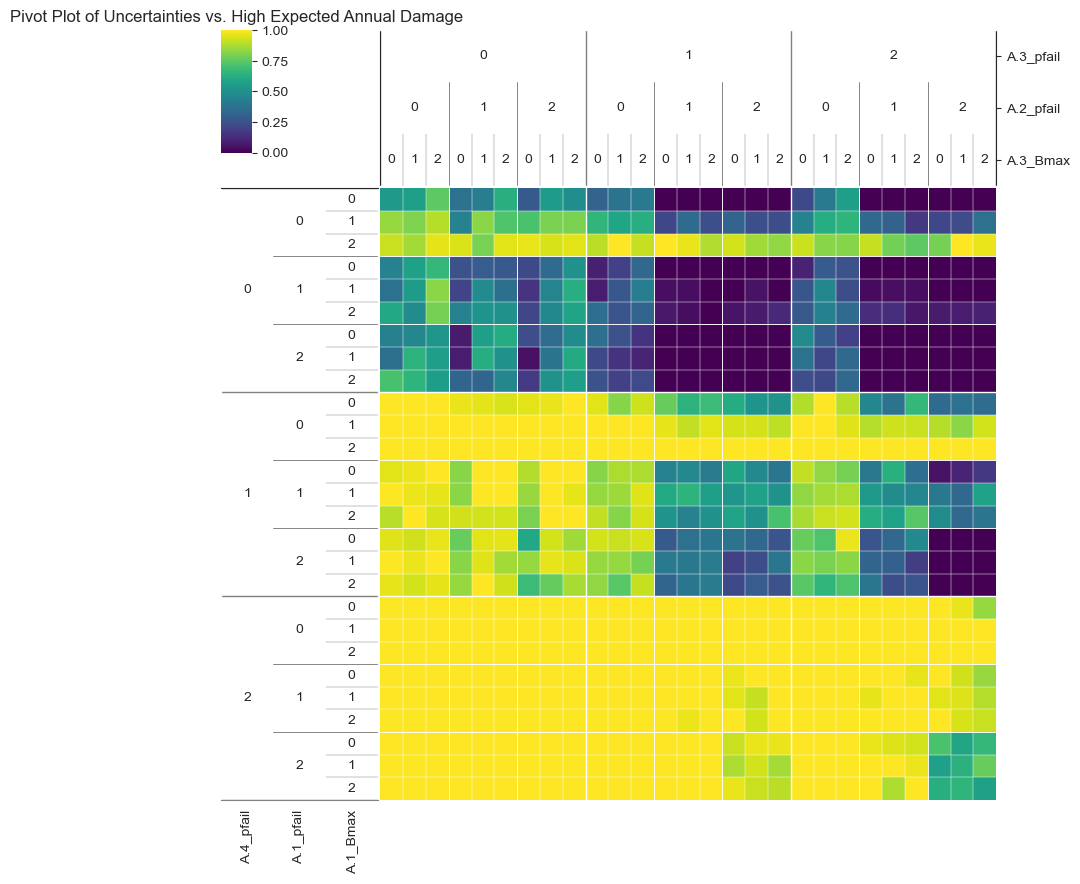

In [42]:
# Assign variables for uncertainties and outcome condition
x = uncertainties_ezp  # Uncertainties data
y = outcomes_zp['A.4_Expected Annual Damage'].values < 3.97e6  # High damage condition

# Create a pivot plot to visualize the relationship between uncertainties and the outcome condition
dimensional_stacking.create_pivot_plot(x, y)
plt.title('Pivot Plot of Uncertainties vs. High Expected Annual Damage')
plt.show()


#### Interpretation of the Dimensional Stacking Plot

The pivot plot visualizes the relationship between various uncertainties and the likelihood of high expected annual damage. The color gradient, ranging from purple to yellow, indicates the proportion of cases with high expected damage, with yellow representing higher proportions. Distinct patterns are visible where yellow clusters highlight combinations of uncertainties that lead to higher expected damage, while purple clusters indicate safer combinations. The axes represent different uncertainty factors (e.g., `A3_pfail`, `A2_pfail`), with indices (0, 1, 2) corresponding to different bin ranges.

In conclusion, this plot effectively identifies critical combinations of uncertainties that significantly contribute to higher risks, aiding in the development of targeted risk mitigation strategies.

### Expected Number of Deaths

In [43]:
#Set the threshold to determine values below a specific limit
count_below_threshold = len(outcomes_zp[outcomes_zp['A.4_Expected Number of Deaths'] < 0.00194])

#Calculate the proportion of values below the threshold
percentage_below_threshold = ((count_below_threshold / len(outcomes_zp['A.4_Expected Number of Deaths'])) * 100)

#Output the calculated percentage
print("The percentage of values below the threshold is: {:.2f}%".format(percentage_below_threshold))

The percentage of values below the threshold is: 68.02%


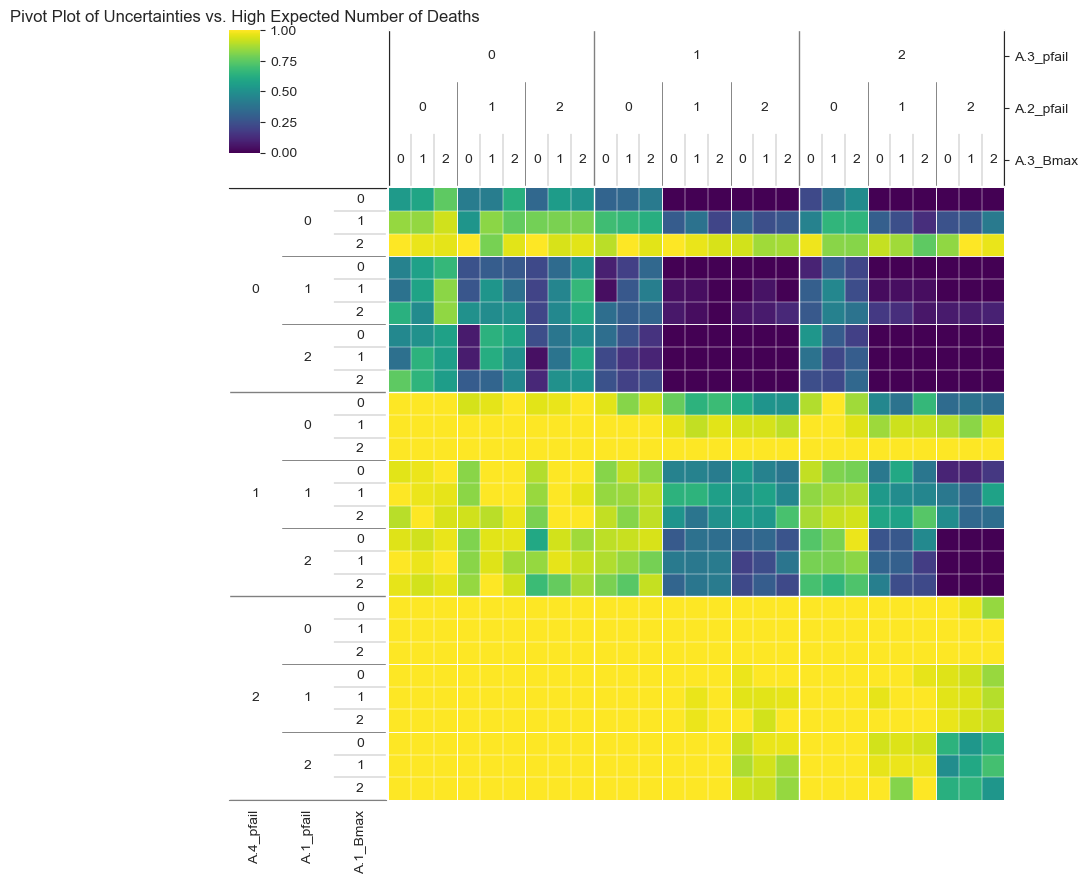

In [44]:
#Assign variables for uncertainties and outcome condition
x = uncertainties_ezp
y = outcomes_zp['A.4_Expected Number of Deaths'].values < 0.00194 # High death count condition

#Create a pivot plot to visualize the relationship between uncertainties and the outcome condition
dimensional_stacking.create_pivot_plot(x, y)
plt.title('Pivot Plot of Uncertainties vs. High Expected Number of Deaths')
plt.show()


#### Interpretation of the Dimensional Stacking Plot

The pivot plot illustrates the relationship between various uncertainties and the likelihood of high expected deaths, defined as values below the threshold of 0.00194. The color gradient, ranging from purple to yellow, indicates the proportion of cases with high expected deaths, with yellow representing higher proportions. Distinct patterns emerge, where yellow clusters signify combinations of uncertainties that result in higher expected deaths, while purple clusters indicate safer combinations. The axes represent different uncertainty factors (e.g., `A3_pfail`, `A2_pfail`), with indices (0, 1, 2) corresponding to different bin ranges.

In conclusion, this plot helps identify critical combinations of uncertainties that significantly contribute to higher risks, thereby guiding targeted risk mitigation strategies.

## 2.1.3 PRIM Analysis

In this section, PRIM is applied to the zero policy scenario. This analysis targets the 10% worst outcomes for both the Expected Number of Deaths and the Expected Annual Damage, as previously outlined.

The PRIM algorithm was executed using the default value for the peeling alpha and a threshold of 0.8. This threshold was selected after a brief sensitivity analysis, which indicated that alternative thresholds did not produce significantly different results.

### Expected Number of Deaths

INFO:EMA.ema_workbench.analysis.prim:20000 points remaining, containing 2000 cases of interest
C:\Users\samuf\anaconda3\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '126.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
C:\Users\samuf\anaconda3\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '126.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
INFO:EMA.ema_workbench.analysis.prim:mean: 0.9961795606494747, mass: 0.05235, coverage: 0.5215, density: 0.9961795606494747 restricted_dimensions: 5


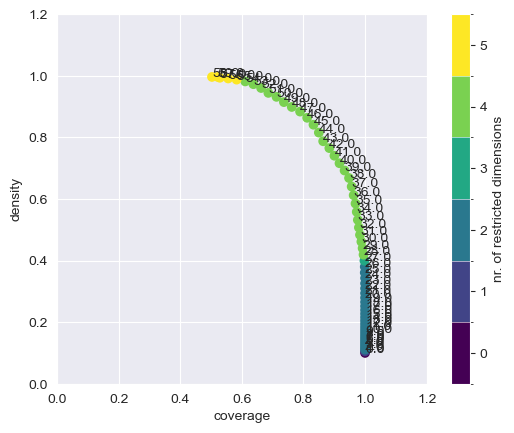

In [45]:
# Define variables for uncertainties and outcome condition
x = uncertainties_ezp
y = outcomes_zp['A.4_Expected Number of Deaths'].values > np.percentile(outcomes_zp['A.4_Expected Number of Deaths'].values, 90)  # High death count condition

# Applying PRIM to the 10% worst outcomes for the expected number of deaths (highest number of deaths)
prim_alg = prim.Prim(x, y, threshold=0.8)  # Initialize PRIM algorithm with a threshold
box2 = prim_alg.find_box()  # Find the box (region) that represents the tradeoff between coverage and density

# Show tradeoff plot with annotations
box2.show_tradeoff(annotated=True)
plt.show()  # Display the plot


coverage       0.832500
density        0.840909
id            45.000000
k           1665.000000
mass           0.099000
mean           0.840909
n           1980.000000
res_dim        4.000000
Name: 45, dtype: float64

             box 45                                  
                min       max       qp value qp value
A.4_pfail  0.000046  0.234452            NaN      0.0
A.1_pfail  0.371214  0.999966  1.745977e-149      NaN
A.3_pfail  0.239697  0.999976   1.590955e-65      NaN
A.2_pfail  0.150415  0.999976   7.927192e-26      NaN


C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

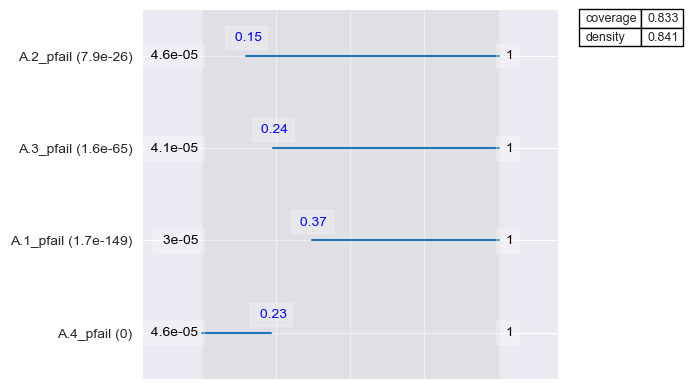

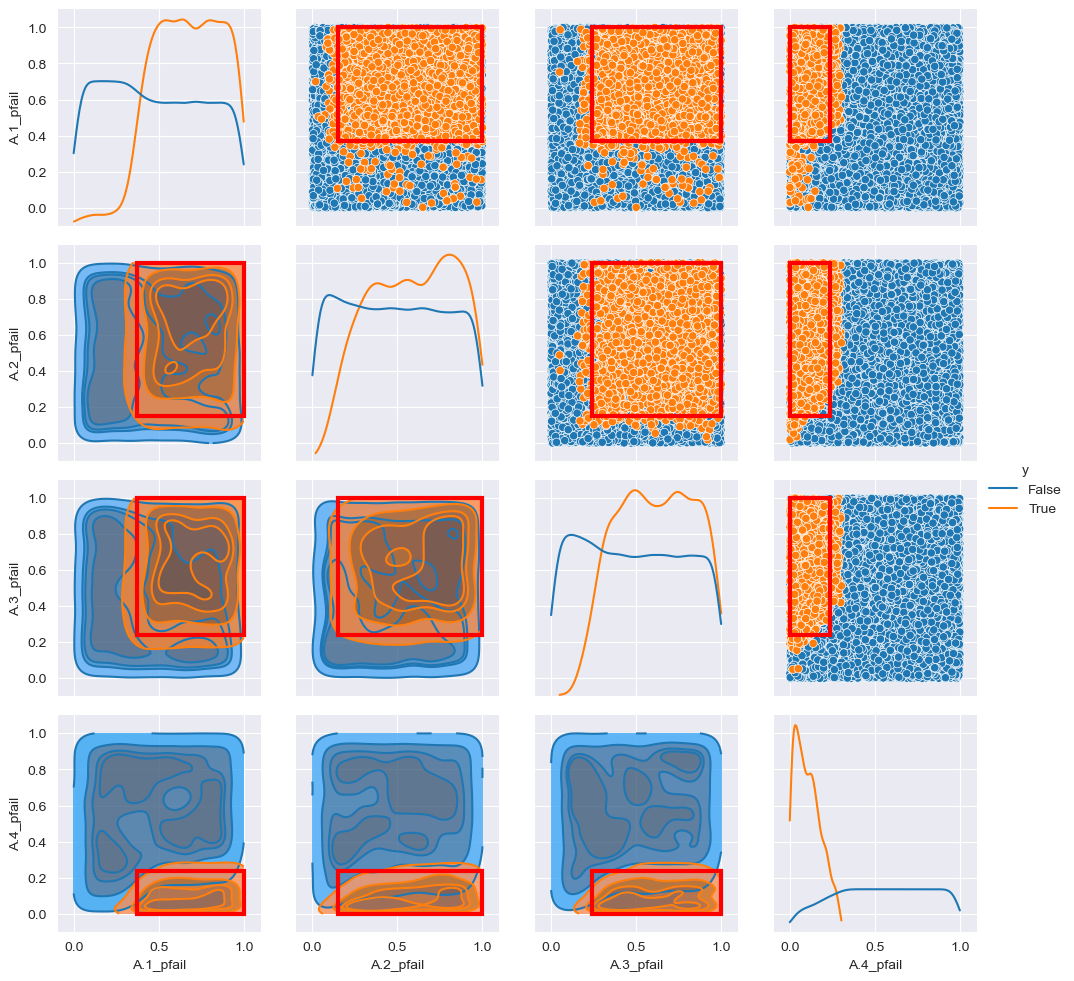

In [46]:
# Inspect box 45 of the PRIM algorithm results
box2.inspect(45)

# Inspect box 45 with a graph-style representation
box2.inspect(45, style="graph")

# Show pairs scatter plot for box 45
box2.show_pairs_scatter(45)

plt.show()  

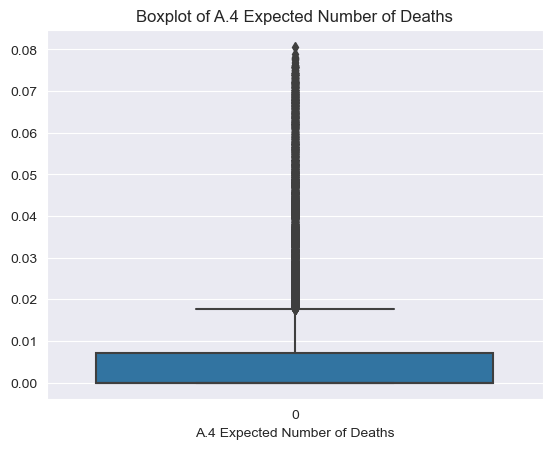

In [47]:
sns.boxplot(data=outcomes_zp['A.4_Expected Number of Deaths'])
plt.title('Boxplot of A.4 Expected Number of Deaths')
plt.xlabel('A.4 Expected Number of Deaths')
plt.show()

#### Interpretation of boxplot 
**Median**
The thick line within the box represents the median of the data. In this plot, the median value of 'A.4_Expected Number of Deaths' is very close to 0.

**Whiskers**
The lines extending from the top and bottom of the box (whiskers) represent the range of the data within 1.5 times the IQR from the Q1 and Q3. Any data points outside this range are considered outliers.

**Outliers**
The dots above the whiskers represent outliers. In this plot, there are a significant number of outliers extending up to around 0.08. These outliers indicate that while the majority of the data points are very close to 0, there are some instances where the expected number of deaths is significantly higher.

The boxplot indicates that the majority of scenarios for 'A.4_Expected Number of Deaths' result in a very low number of expected deaths, close to zero. However, there are several outliers, suggesting that under certain conditions, the expected number of deaths can be much higher. This distribution suggests that while the system generally performs well in minimizing deaths, there are critical scenarios where the performance significantly worsens.

### Expected Annual Damage

INFO:EMA.ema_workbench.analysis.prim:20000 points remaining, containing 2000 cases of interest
C:\Users\samuf\anaconda3\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '125.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
INFO:EMA.ema_workbench.analysis.prim:mean: 0.9850894632206759, mass: 0.0503, coverage: 0.4955, density: 0.9850894632206759 restricted_dimensions: 5


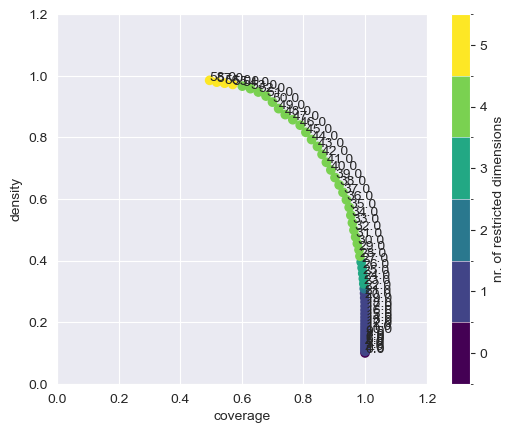

In [48]:
# applying PRIM to the 10% worst outcomes for the expected total costs for our dike ring 
x = uncertainties_ezp  # Uncertainties data
y = outcomes_zp['A.4_Expected Annual Damage'] > np.percentile(outcomes_zp[['A.4_Expected Annual Damage']], 90)  # High damage condition based on the 90th percentile

# Initialize PRIM algorithm with a threshold
prim_alg = prim.Prim(x, y, threshold=0.8)  # Setting the threshold to 0.8 for tradeoff
box1 = prim_alg.find_box()  # Find the box (region) that represents the tradeoff between coverage and density

# Show tradeoff plot with annotations
box1.show_tradeoff(annotated=True)
plt.show()  # Display the plot


coverage       0.808000
density        0.816162
id            45.000000
k           1616.000000
mass           0.099000
mean           0.816162
n           1980.000000
res_dim        4.000000
Name: 45, dtype: float64

             box 45                                  
                min       max       qp value qp value
A.4_pfail  0.000046  0.222745            NaN      0.0
A.1_pfail  0.371214  0.999966  1.845817e-127      NaN
A.3_pfail  0.232200  0.999976   8.758986e-54      NaN
A.2_pfail  0.103314  0.999976   9.212476e-14      NaN


C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

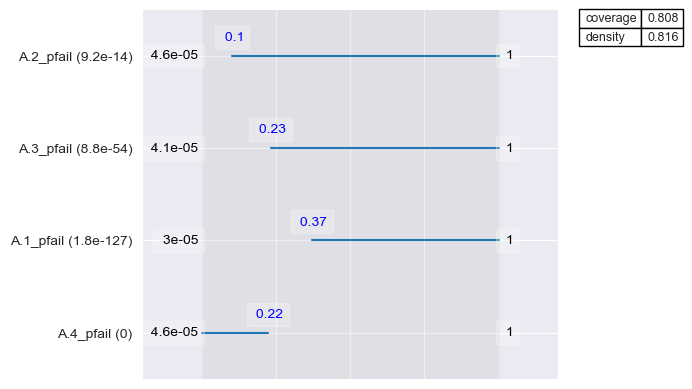

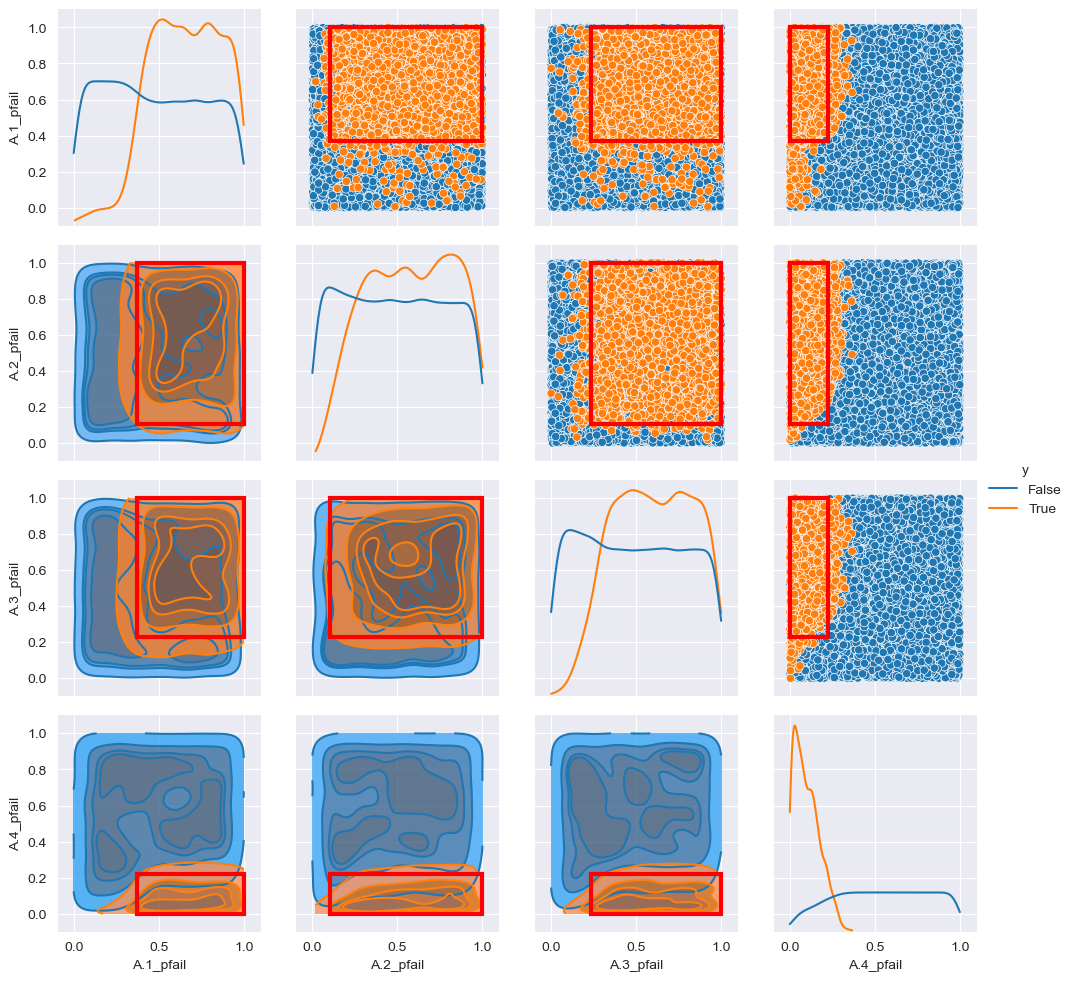

In [49]:
# Box 45 has been selected due to the +/- 80% density
box1.inspect(45)
box1.inspect(45, style="graph")
box1.show_pairs_scatter(45)
plt.show()

In [50]:
box1.inspect(45)

coverage       0.808000
density        0.816162
id            45.000000
k           1616.000000
mass           0.099000
mean           0.816162
n           1980.000000
res_dim        4.000000
Name: 45, dtype: float64

             box 45                                  
                min       max       qp value qp value
A.4_pfail  0.000046  0.222745            NaN      0.0
A.1_pfail  0.371214  0.999966  1.845817e-127      NaN
A.3_pfail  0.232200  0.999976   8.758986e-54      NaN
A.2_pfail  0.103314  0.999976   9.212476e-14      NaN


[None]

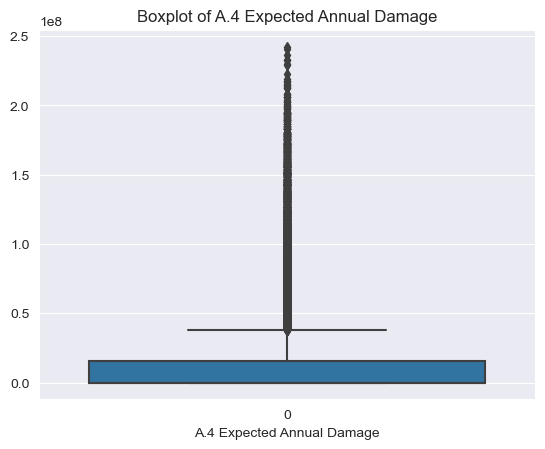

In [51]:
sns.boxplot(data=outcomes_zp['A.4_Expected Annual Damage'])
plt.title('Boxplot of A.4 Expected Annual Damage')
plt.xlabel('A.4 Expected Annual Damage')
plt.show()

#### Interpretation of the boxplot
The boxplot indicates that the majority of scenarios for 'A.4_Expected Annual Damage' result in very low expected annual damage, close to zero. However, there are several outliers, suggesting that under certain conditions, the expected annual damage can be much higher. This distribution suggests that while the system generally performs well in minimizing expected annual damage, there are critical scenarios where the performance significantly worsens. 

# 2.2 Scenaro discovery 100 random policies
## 2.2.1 Feature scoring

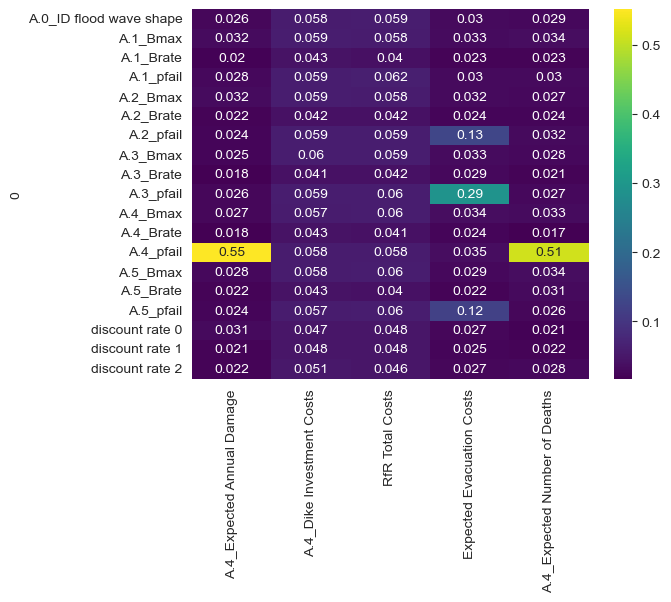

In [52]:
# Calculating feature scores for each uncertainty and all outcomes
feature_scores = feature_scoring.get_feature_scores_all(uncertainties_erp,
                                                        outcomes_rp.drop(columns='policy'))

# Creating a heatmap to visualize the feature scores
sns.heatmap(feature_scores, cmap="viridis", annot=True)
plt.show()  # Display the heatmap


# Interpretation of the Heatmap 

## Key Insights:

1. **High Impact Uncertainties**:
    - **A4_pfail**: Shows the highest feature score across multiple outcomes, indicating a significant impact on 'A.4_Expected Annual Damage', 'A.4_Dike Investment Costs', 'RfR Total Costs', and 'A.4_Expected Number of Deaths'.
    - **A3_pfail**: Also has a noticeable impact, particularly on 'Expected Evacuation Costs'.

2. **Moderate Impact Uncertainties**:
    - **A2_pfail**: Influences 'Expected Evacuation Costs'.

3. **Low Impact Uncertainties**:
    - **Discount rates**: Show relatively low feature scores across all outcomes, indicating minor impact.

The feature scores highlight the critical uncertainties affecting the various outcomes. Specifically, failure probabilities of dikes (e.g., A4_pfail, A3_pfail) have the most substantial impact on expected annual damage, investment costs, and expected number of deaths. Addressing these uncertainties should be a priority in the policy development.
